# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Code Challenge: More Qwertys. 
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [50]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Create data

torch.Size([300, 2])
torch.Size([300])


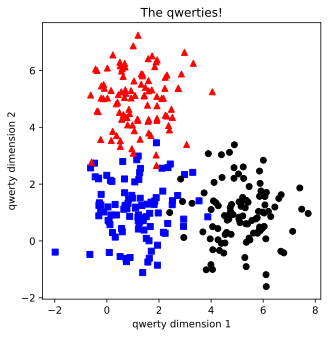

In [51]:
# create data

nPerClust = 100
blur = 1

# Where we are going to center the clusters
A = [  1, 1 ]
B = [  5, 1 ]
C = [  1, 5 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()

# true labels (category labels, as we are classifying)
labels = torch.zeros(len(data_np), dtype=torch.long)
labels[0:100] = 0
labels[100:200] = 1
labels[200:300] = 2

print(data.shape)
print(labels.shape)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Build the model

In [52]:
# Model architecture
ANNQwerty = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 3),
)

# Loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNQwerty.parameters(), lr=0.01) # stochastic gradient descent

# Train the model

In [53]:
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

    # forward pass
    yHat = ANNQwerty(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    matches = torch.argmax(yHat, axis=1) == labels # We select the max value and see if it matches
    matchesNumeric = matches.float()
    accuracyPct = 100*torch.mean(matchesNumeric)
    ongoingAcc.append(accuracyPct)

# final forward pass
predictions = ANNQwerty(data)

predLabels = torch.argmax(predictions, axis=1)

sm = nn.Softmax(dim=1)

## Visualize the results

Final accuracy: 96.33%
Accuracy for label 0: 96.00%
Accuracy for label 1: 96.00%
Accuracy for label 2: 97.00%


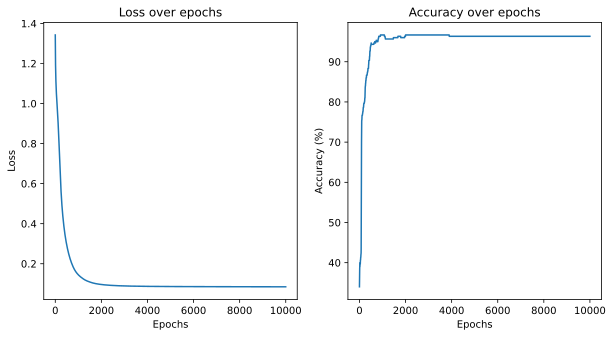

In [54]:
# report accuracy 
predLabelsCat = torch.argmax(sm(predictions), axis=1)
totalAcc = 100*torch.mean((predLabels == labels).float())
accuracy_label_0 = 100*torch.mean((predLabelsCat[labels==0] == labels[labels==0]).float())
accuracy_label_1 = 100*torch.mean((predLabelsCat[labels==1] == labels[labels==1]).float())
accuracy_label_2 = 100*torch.mean((predLabelsCat[labels==2] == labels[labels==2]).float())

print('Final accuracy: {:.2f}%'.format(totalAcc))
print('Accuracy for label 0: {:.2f}%'.format(accuracy_label_0))
print('Accuracy for label 1: {:.2f}%'.format(accuracy_label_1))
print('Accuracy for label 2: {:.2f}%'.format(accuracy_label_2))

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(losses.detach())
ax[0].set_title('Loss over epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(ongoingAcc)
ax[1].set_title('Accuracy over epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')

plt.show()

## Plot the softmax model outputs

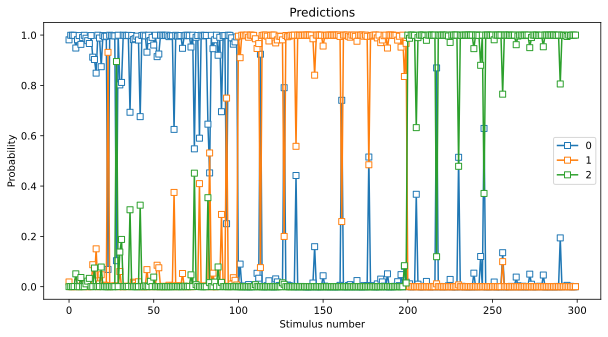

In [58]:
fig = plt.figure(figsize=(10,5))

plt.plot(sm(predictions.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.title('Predictions')
plt.legend(['0','1','2'])
plt.show()